In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("df.csv")
df1

,Date Posted,Text,Label
0,2/11/20,Just in: Novel coronavirus named 'Covid-19': U...,1
1,2/12/20,WHO officially names #coronavirus as Covid-19....,1
2,2/12/20,"The #UN #health agency announced that ""COVID-1...",1
3,2/14/20,The Indian Embassy in Tokyo has said that one ...,1
4,2/15/20,Ground Zero | How Kerala used its experience i...,1
...,...,...,...
7583,6/23/20,Bill Gates said that the COVID-19 vaccine wil...,0
7584,6/23/20,COVID-19 vaccine candidates will insert micro...,0
7585,6/23/20,An image claims that chroma screen panels are...,0
7586,6/23/20,"Alexandria Ocasio-Cortez tweeted, ""It's vital...",0


In [3]:
import re

#Data Cleaning & Text preprocessing 
texts_list = []

for index, row in df1.iterrows():
    x = df1["Text"][index]
    #remove https
    x = "".join(re.sub('https:\/\/.*', "", x))
    #remove http
    x = "".join(re.sub('http:\/\/.*', "", x))
    #remove twitter pic
    x = "".join(re.split('pic.twitter.com/.*', x))
    #remove usernames starting with @
    x = "".join(re.split('@.*', x))
    #remove special characters except #
    x = re.sub("[:;',.()|?+_\"!?#]", "", x)
    x = re.sub("covid-19", "covid19", x)
    #remove newline
    x = re.sub("\n", " ", x)
    #replace multi spaces with 1 space
    x = re.sub('\s+'," ", x)
    #to lowercase
    x = x.lower()
    texts_list.append(x)

df1['Text'] = texts_list

# Text Augmentation 

In [4]:
import nlpaug.augmenter.word as naw
import nltk
nltk.download('averaged_perceptron_tagger')

aug = naw.SynonymAug(aug_src='wordnet',aug_max=3)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Samson\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [5]:
augmented_sentences=[]
augmented_sentences_labels=[]

for i in range(df1.shape[0]):
    if df1["Label"][i]==0:
        temps=aug.augment(df1["Text"][i],n=1)
        augmented_sentences.append(temps)
        augmented_sentences_labels.append(int(0))
    else:
        temps=aug.augment(df1["Text"][i],n=1)
        augmented_sentences.append(temps)
        augmented_sentences_labels.append(int(1))

In [17]:
print(augmented_sentences[2157])
print(df1["Text"][2157])

first petri dish sundance picture festival may have been covid - 19 brooder
first petri dish sundance film festival may have been covid-19 incubator 


In [7]:
xtra = {'Text': augmented_sentences, "Label": augmented_sentences_labels}
df2 = df1.append(pd.DataFrame(xtra), ignore_index=True)

df2

,Date Posted,Text,Label
0,2/11/20,just in novel coronavirus named covid-19 un he...,1
1,2/12/20,who officially names coronavirus as covid-19 c...,1
2,2/12/20,the un health agency announced that covid-19 w...,1
3,2/14/20,the indian embassy in tokyo has said that one ...,1
4,2/15/20,ground zero how kerala used its experience in ...,1
...,...,...,...
15171,NaN,bill gates pronounce that the covid - 19 vacci...,0
15172,NaN,covid - 19 vaccinum candidate will insert micr...,0
15173,NaN,an image claims that intensity screen panels a...,0
15174,NaN,alexandria ocasio - cortez tweeted its vital t...,0


In [8]:
texts_list = []

for index, row in df2.iterrows():
    x = df2["Text"][index]
    #remove https
    x = "".join(re.sub('https:\/\/.*', "", x))
    #remove http
    x = "".join(re.sub('http:\/\/.*', "", x))
    #remove twitter pic
    x = "".join(re.split('pic.twitter.com/.*', x))
    #remove usernames starting with @
    x = "".join(re.split('@.*', x))
    #remove special characters except #
    x = re.sub("[:;',.()|?+_\"!?#]", "", x)
    x = re.sub("covid-19", "covid19", x)
    #remove newline
    x = re.sub("\n", " ", x)
    #replace multi spaces with 1 space
    x = re.sub('\s+'," ", x)
    #to lowercase
    x = x.lower()
    texts_list.append(x)

df2['Text'] = texts_list

In [9]:
df1.to_csv("Without Text Augmentation.csv")
df2.to_csv("With Text Augmentation.csv")

# Count Vectorizer

Without Text Augmentation

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
cv1 = vectorizer.fit_transform(df1['Text']).toarray()
cv1_df = pd.DataFrame(cv1)
cv1_df

,0,1,2,3,4,5,6,7,8,9,...,12350,12351,12352,12353,12354,12355,12356,12357,12358,12359
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


With Text Augmentation

In [11]:
vectorizer = CountVectorizer()
cv2 = vectorizer.fit_transform(df2['Text']).toarray()
cv2_df = pd.DataFrame(cv2)
cv2_df

,0,1,2,3,4,5,6,7,8,9,...,14744,14745,14746,14747,14748,14749,14750,14751,14752,14753
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modelling 

Without Text Augmentation

In [12]:
X = cv1
Y = df1["Label"].values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 23)

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import itertools



def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without normalization')
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       761
           1       0.94      0.94      0.94       757

    accuracy                           0.94      1518
   macro avg       0.94      0.94      0.94      1518
weighted avg       0.94      0.94      0.94      1518

Confusion Matrix, without normalization


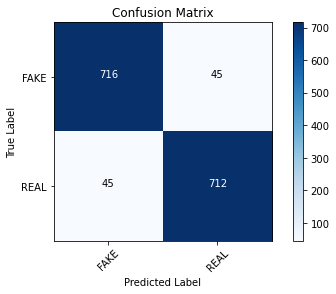

In [15]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train, Y_train)
Y_pred1 = model1.predict(X_test)

print(classification_report(Y_test, Y_pred1))
cm = metrics.confusion_matrix(Y_test, Y_pred1)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       761
           1       0.89      0.89      0.89       757

    accuracy                           0.89      1518
   macro avg       0.89      0.89      0.89      1518
weighted avg       0.89      0.89      0.89      1518

Confusion Matrix, without normalization


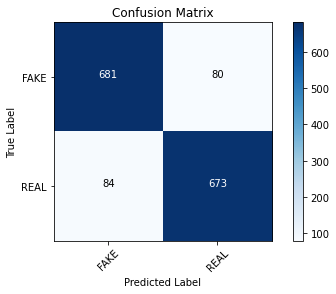

In [16]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(X_train,Y_train)
Y_pred2 = model2.predict(X_test)

print(classification_report(Y_test, Y_pred2))
cm = metrics.confusion_matrix(Y_test, Y_pred2)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       761
           1       0.90      0.94      0.92       757

    accuracy                           0.92      1518
   macro avg       0.92      0.92      0.92      1518
weighted avg       0.92      0.92      0.92      1518

Confusion Matrix, without normalization


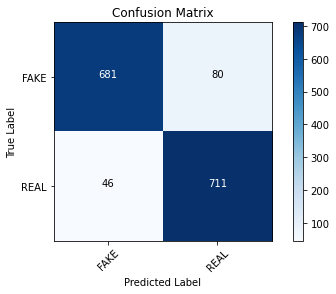

In [17]:
from sklearn.naive_bayes import MultinomialNB

model3 = MultinomialNB()
model3.fit(X_train,Y_train)
Y_pred3 = model3.predict(X_test)

print(classification_report(Y_test, Y_pred3))
cm = metrics.confusion_matrix(Y_test, Y_pred3)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       761
           1       0.93      0.92      0.92       757

    accuracy                           0.92      1518
   macro avg       0.92      0.92      0.92      1518
weighted avg       0.92      0.92      0.92      1518

Confusion Matrix, without normalization


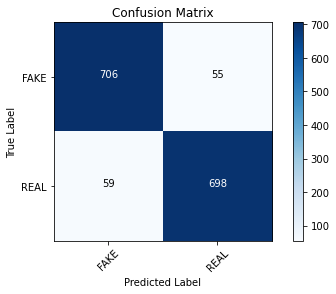

In [18]:
from sklearn.linear_model import PassiveAggressiveClassifier

model4 = PassiveAggressiveClassifier()
model4.fit(X_train,Y_train)
Y_pred4 = model4.predict(X_test)

print(classification_report(Y_test, Y_pred4))
cm = metrics.confusion_matrix(Y_test, Y_pred4)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

With Text Augmentation

In [19]:
X = cv2
Y = df2["Label"].values

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 23)

C:\Users\Samson\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1492
           1       0.97      0.98      0.97      1544

    accuracy                           0.97      3036
   macro avg       0.97      0.97      0.97      3036
weighted avg       0.97      0.97      0.97      3036

Confusion Matrix, without normalization


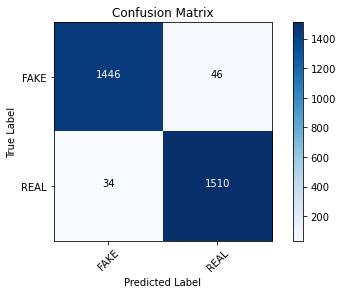

In [21]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train, Y_train)
Y_pred1 = model1.predict(X_test)

print(classification_report(Y_test, Y_pred1))
cm = metrics.confusion_matrix(Y_test, Y_pred1)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1492
           1       0.91      0.93      0.92      1544

    accuracy                           0.92      3036
   macro avg       0.92      0.92      0.92      3036
weighted avg       0.92      0.92      0.92      3036

Confusion Matrix, without normalization


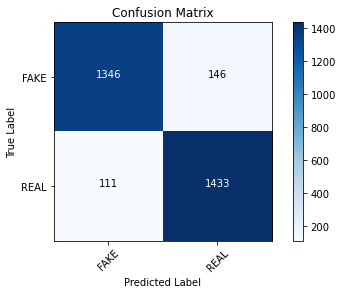

In [22]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(X_train,Y_train)
Y_pred2 = model2.predict(X_test)

print(classification_report(Y_test, Y_pred2))
cm = metrics.confusion_matrix(Y_test, Y_pred2)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1492
           1       0.94      0.96      0.95      1544

    accuracy                           0.94      3036
   macro avg       0.95      0.94      0.94      3036
weighted avg       0.95      0.94      0.94      3036

Confusion Matrix, without normalization


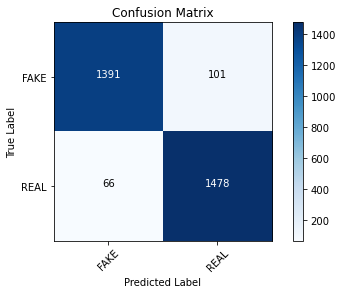

In [23]:
from sklearn.naive_bayes import MultinomialNB

model3 = MultinomialNB()
model3.fit(X_train,Y_train)
Y_pred3 = model3.predict(X_test)

print(classification_report(Y_test, Y_pred3))
cm = metrics.confusion_matrix(Y_test, Y_pred3)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1492
           1       0.98      0.98      0.98      1544

    accuracy                           0.98      3036
   macro avg       0.98      0.98      0.98      3036
weighted avg       0.98      0.98      0.98      3036

Confusion Matrix, without normalization


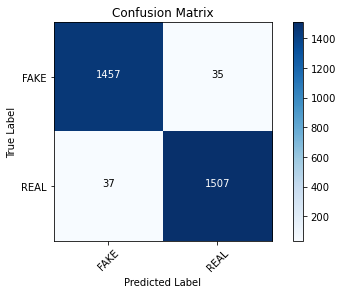

In [24]:
from sklearn.linear_model import PassiveAggressiveClassifier

model4 = PassiveAggressiveClassifier()
model4.fit(X_train,Y_train)
Y_pred4 = model4.predict(X_test)

print(classification_report(Y_test, Y_pred4))
cm = metrics.confusion_matrix(Y_test, Y_pred4)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

#  TD-IF Vectorizer

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tv = vectorizer.fit_transform(df2['Text']).toarray()
tv_df = pd.DataFrame(tv)
tv_df

,0,1,2,3,4,5,6,7,8,9,...,14744,14745,14746,14747,14748,14749,14750,14751,14752,14753
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
X = tv
Y = df2["Label"].values

# Modelling

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 23)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1492
           1       0.94      0.96      0.95      1544

    accuracy                           0.95      3036
   macro avg       0.95      0.95      0.95      3036
weighted avg       0.95      0.95      0.95      3036

Confusion Matrix, without normalization


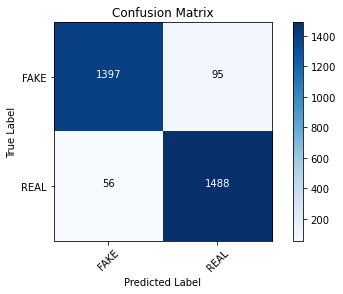

In [28]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train, Y_train)
Y_pred1 = model1.predict(X_test)

print(classification_report(Y_test, Y_pred1))
cm = metrics.confusion_matrix(Y_test, Y_pred1)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1492
           1       0.91      0.91      0.91      1544

    accuracy                           0.91      3036
   macro avg       0.91      0.91      0.91      3036
weighted avg       0.91      0.91      0.91      3036

Confusion Matrix, without normalization


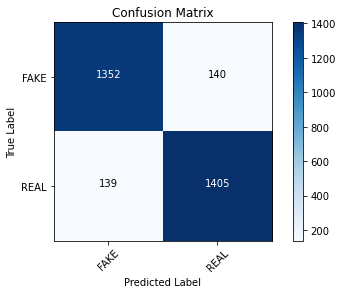

In [29]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()
model2.fit(X_train,Y_train)
Y_pred2 = model2.predict(X_test)

print(classification_report(Y_test, Y_pred2))
cm = metrics.confusion_matrix(Y_test, Y_pred2)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1492
           1       0.93      0.95      0.94      1544

    accuracy                           0.94      3036
   macro avg       0.94      0.94      0.94      3036
weighted avg       0.94      0.94      0.94      3036

Confusion Matrix, without normalization


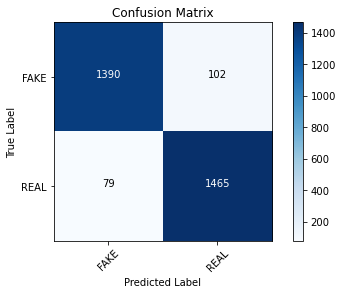

In [30]:
from sklearn.naive_bayes import MultinomialNB

model3 = MultinomialNB()
model3.fit(X_train,Y_train)
Y_pred3 = model3.predict(X_test)

print(classification_report(Y_test, Y_pred3))
cm = metrics.confusion_matrix(Y_test, Y_pred3)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1492
           1       0.98      0.98      0.98      1544

    accuracy                           0.98      3036
   macro avg       0.98      0.98      0.98      3036
weighted avg       0.98      0.98      0.98      3036

Confusion Matrix, without normalization


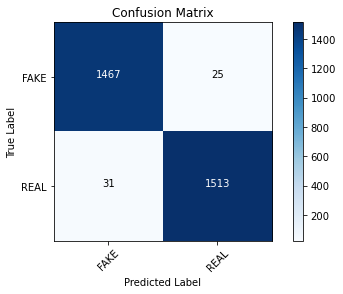

In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier

model4 = PassiveAggressiveClassifier()
model4.fit(X_train,Y_train)
Y_pred4 = model4.predict(X_test)

print(classification_report(Y_test, Y_pred4))
cm = metrics.confusion_matrix(Y_test, Y_pred4)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])